In [54]:
import pandas as pd 
from pandas import read_csv
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#Scikit-learn Models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, precision_score, recall_score, classification_report,confusion_matrix,average_precision_score 


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Import Data:

In [2]:
filename = 'creditcard.csv'
dataset = read_csv(filename)

In [3]:
dataset.shape

(284807, 31)

In [4]:
dataset.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [5]:
dataset.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
print ("Rows     : " ,dataset.shape[0])
print ("Columns  : " ,dataset.shape[1])
print ("\nFeatures : \n" ,dataset.columns.tolist())

Rows     :  284807
Columns  :  31

Features : 
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [7]:
print ("\nMissing values :  ", dataset.isnull().any().values.sum())
print ("\nUnique values in class : ", dataset.Class.nunique())


Missing values :   0

Unique values in class :  2


## Observations:

* There are totally 31 columns and 284807 rows
* Class is the target column/ Response varible with binary Classes.
    - 1 (Fraudulent)
    - 0 (Otherwise)
* 'Amount' is the transaction Amount
* 'Time' contains the seconds elapsed between each transaction 
* V1 - V28 are the principal components obtained with PCA
* All the features are numeric (float64 or int64) which is fine for modelling
* There are no missing values observed

0    284315
1       492
Name: Class, dtype: int64

Fraud is 0.17304750013189596% of our data.


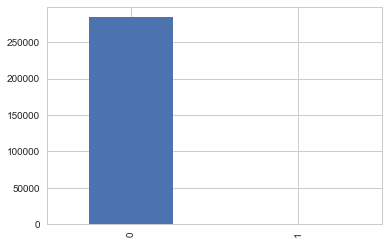

In [8]:
dataset.Class.value_counts().sort_index().plot.bar()
print(dataset.Class.value_counts())

print('\nFraud is {}% of our data.'.format(dataset['Class'].value_counts()[1] / 
                                         float(dataset['Class'].value_counts()[0])*100))

There is a huge class imbalance in the dataset.

* 492 fraudulent transactions vs. 284,315 legit
* We will have treat this class imbalance using SMOTE
* the positive class (frauds) account for 0.172% of all transactions.
* For validation of the model, using a confusion matrix or accuracy are not the most relevant and will be prefered alternative solutions using AUC.

## Base Line Accuracy

In [9]:
print(dataset.groupby(['Class']).count())

print("Baseline Accuray: ", 284315/(284315+492))

         Time      V1      V2      V3      V4      V5      V6      V7      V8  \
Class                                                                           
0      284315  284315  284315  284315  284315  284315  284315  284315  284315   
1         492     492     492     492     492     492     492     492     492   

           V9   ...       V20     V21     V22     V23     V24     V25     V26  \
Class           ...                                                             
0      284315   ...    284315  284315  284315  284315  284315  284315  284315   
1         492   ...       492     492     492     492     492     492     492   

          V27     V28  Amount  
Class                          
0      284315  284315  284315  
1         492     492     492  

[2 rows x 30 columns]
Baseline Accuray:  0.9982725143693799


## Descriptive Statistics

In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


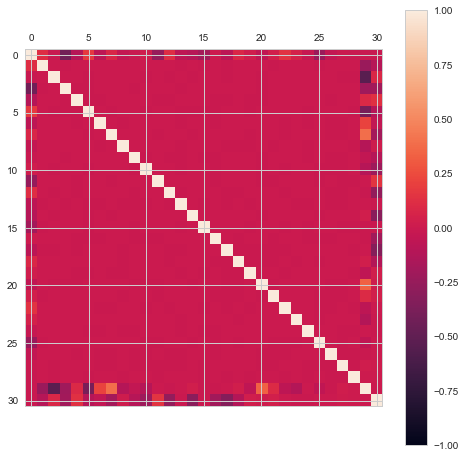

In [11]:
from pandas.plotting import scatter_matrix

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

* V1 - V28 predictors are not correlated to each other. Indeed, as Principal Components, there are orthogonal to each other.

* The 'blurred' border is due to column 'Time', 'Amount' and 'Class': there are no significant correlation between the variables.

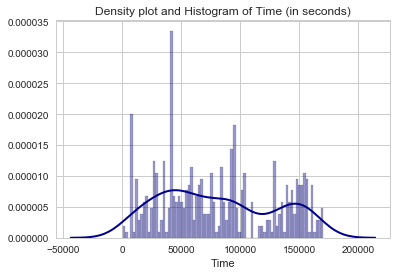

In [12]:
frauds = dataset[dataset.Class==True]

sns.distplot(frauds.Time,
             bins=80, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title('Density plot and Histogram of Time (in seconds)')
plt.show()

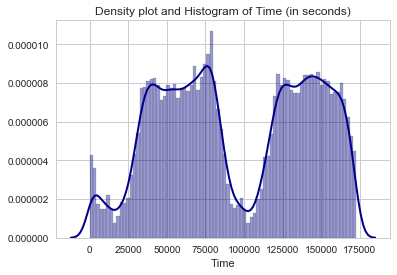

In [13]:
legit = dataset[dataset.Class==False]

sns.distplot(legit.Time,
             bins=80, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title('Density plot and Histogram of Time (in seconds)')
plt.show()

## Observations:

* Most of the fraud transactions might happen during night and the density is flat comparitively

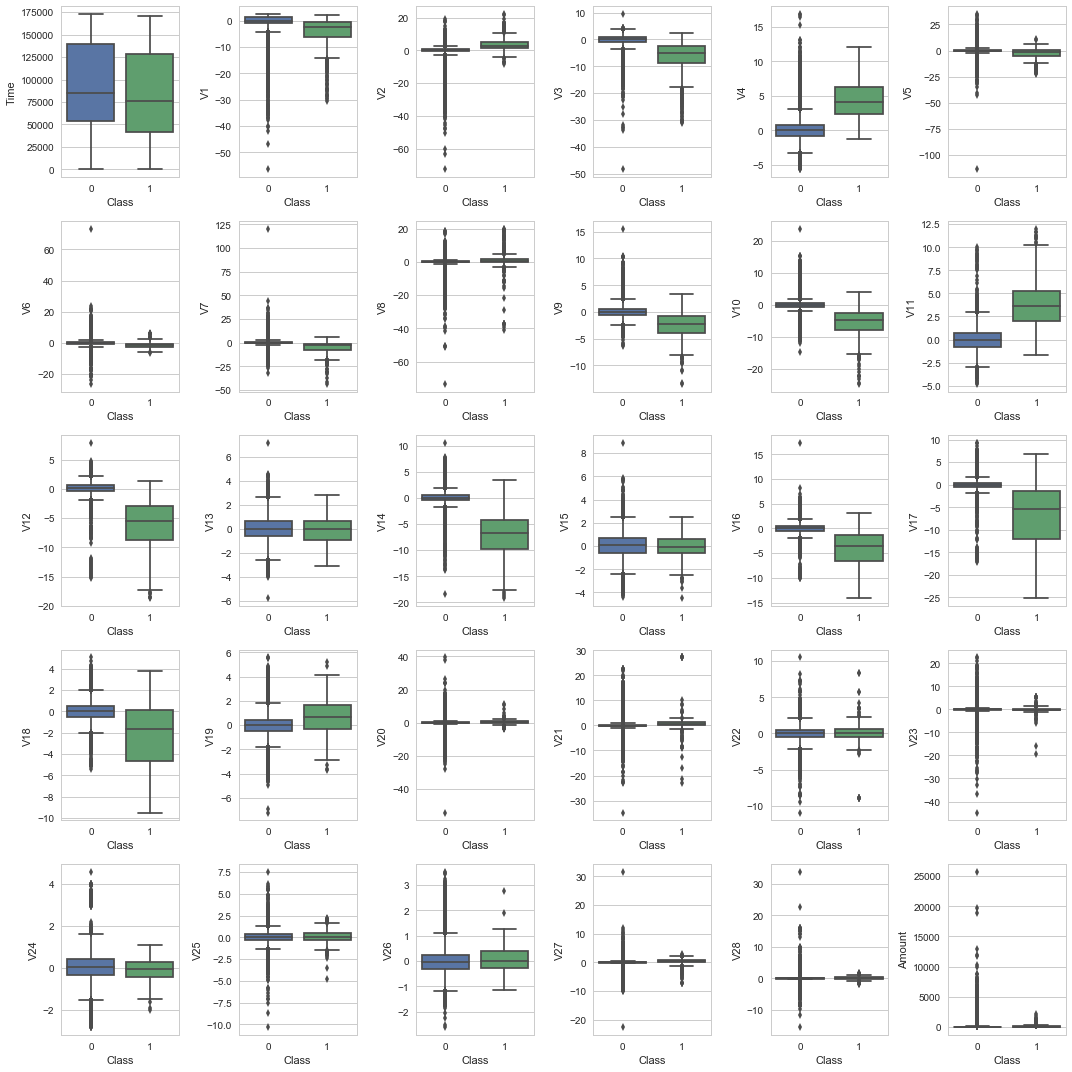

In [14]:
fig, axes = plt.subplots(5, 6, figsize = (15,15))
axes = axes.flatten()

for i in range(0,len(dataset.columns) - 1):
    sns.boxplot(x="Class", y=dataset.iloc[:,i], data=dataset, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

## Observations:

* There are many outliers in the dataset which might be because of the transactions people do have huge difference.

# Handling Class Imbalance - SMOTE

In [15]:
from collections import Counter
from imblearn.over_sampling import SMOTE

X = dataset.drop("Class", axis = 1)
Y = dataset.Class

print('Original dataset shape %s' % Counter(Y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, Y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


## Sub Sampling 

To continue our analysis of the dataset, we could:

1. Use the whole dataset as it is: so no sampling
2. Create a new dataset composed of the 492 frauds and of 492 random genuine transactions (50/50 sampling). If so, we would have to ensure that the 492 random genuine transactions are representative of the genuine transactions...
3. A way to manage this would be to resample 492 genuine transactions randomly N times and to compare results.

In [20]:
legit_sub= legit.sample(492, random_state=seed)
dataset_sub = frauds.append(legit_sub, ignore_index=True)

dataset_sub = dataset_sub.drop('Time',axis=1)

print('This sub dataset contains ',dataset_sub.shape[0],'rows')
print('This sub dataset contains ',dataset_sub.shape[1],'columns')

This sub dataset contains  984 rows
This sub dataset contains  30 columns


In [21]:
dataset_sub.groupby('Class').size()

Class
0    492
1    492
dtype: int64

# Model Building and Evaluation

In [22]:
X = dataset_sub.drop('Class',axis=1)
Y = dataset_sub.Class

validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size)

In [23]:
print('Proportion of fraud in train:',Y_train[Y_train == True].shape[0]/X_train.shape[0])
print('Proportion of fraud in test:',Y_validation[Y_validation == True].shape[0]/X_validation.shape[0])

Proportion of fraud in train: 0.5006353240152478
Proportion of fraud in test: 0.49746192893401014


In [24]:
print("X_train_shape : ", X_train.shape)
print("X_validation_shape : ", X_validation.shape)

print("Y_train_shape : ", Y_train.shape)
print("Y_validation_shape : ", Y_validation.shape)

X_train_shape :  (787, 29)
X_validation_shape :  (197, 29)
Y_train_shape :  (787,)
Y_validation_shape :  (197,)


## Training the model 

In [27]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [28]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(kernel = 'linear')))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)  
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)  
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

LR: 0.941594 (0.032140)
NB: 0.911149 (0.027557)
CART: 0.897111 (0.048915)
SVM: 0.935216 (0.030297)


## Hyper Tuning of Parameters

In [29]:
#Logistic Regression
parameters = {'C':np.logspace(0, 4, 10), 
              'penalty' : ['l1', 'l2']}

model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=parameters, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.947903 using {'C': 1291.5496650148827, 'penalty': 'l2'}


In [31]:
#SVM
C = np.linspace(0.001,0.01,10)
kernel_values = ['rbf', 'sigmoid', 'linear']

parameters = dict(C=C,kernel=kernel_values)

model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=parameters, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.941550 using {'C': 0.1, 'kernel': 'linear'}


In [32]:
#Decision Tree Hyper Tuning
max_depth = np.array([1,3,5,7,9,11,13,15,17,19,21])
min_samples_leaf = np.array([3,5,7,9,11,13,15,17,19,21])
param_grid = dict(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
#param_grid = dict(max_depth=max_depth)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.928844 using {'max_depth': 3, 'min_samples_leaf': 7}


## Training the model after hyper tuning

In [33]:
models = []
models.append(('LR', LogisticRegression(C = 1291.5496650148827, penalty = 'l2')))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 7)))
models.append(('SVM', SVC(C = 0.1, kernel = 'linear')))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)  
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)  
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

LR: 0.947907 (0.028652)
NB: 0.911149 (0.027557)
CART: 0.927637 (0.034417)
SVM: 0.941594 (0.027272)


# Boosting the model using Ensemble Techniques

In [34]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('RF', RandomForestClassifier()))

results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.933934 (0.024641)
RF: 0.939046 (0.030934)


# Hyper tuning the Ensemble models

In [35]:
# Adaboost Classifier
learning_rate=np.array([0.05, 0.1, 0.25, 0.5, 0.75, 1])
n_estimators=np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
model = AdaBoostClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.945362 using {'learning_rate': 0.1, 'n_estimators': 100}


In [36]:
# RandomForest Classifier

n_estimators=np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
param_grid = dict(n_estimators=n_estimators)
model = RandomForestClassifier()
kRandomForestClassifierForestClassifierForestClassifierForestClassifierndomForestClassifierld = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.944091 using {'n_estimators': 90}


# Training Ensemble models after Hyper tuning

In [37]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier(learning_rate = 0.1, n_estimators = 100)))
ensembles.append(('RF', RandomForestClassifier(n_estimators = 90)))

results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.945407 (0.026607)
RF: 0.941577 (0.033593)


## Validation of the trained Models

In [38]:
models = []
models.append(('LR', LogisticRegression(C = 1291.5496650148827, penalty = 'l2')))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 7)))
models.append(('SVM', SVC(C = 0.1, kernel = 'linear')))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_validation, Y_validation, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.878684 (0.068070)
NB: 0.914474 (0.054674)
CART: 0.853947 (0.081454)
SVM: 0.919737 (0.059873)


In [39]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier(learning_rate = 0.1, n_estimators = 100)))
ensembles.append(('RF', RandomForestClassifier(n_estimators = 90)))

results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_validation, Y_validation, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.894211 (0.064758)
RF: 0.909211 (0.062388)


# Model Comparison Before Finalizing

Among the above models we could see that the Support Vector Machine and Random Forest Classifier performed better with the dataset with the mean accuracy of 90%. Lets compare these two models!!

In [40]:
models = []
models.append(('SupportVectorMachine', SVC(C = 0.1, kernel = 'linear')))
models.append(('RandomForestClassifier', RandomForestClassifier(n_estimators = 90)))

f1score = []
precisionscore = []
recallscore = []
avg_pre_rec_score = []
names = []
model_acc_test = []
model_acc_train = []

for name, model in models: 
       
    # fitting the train data
    model.fit(X_train,Y_train)
    
    #predicting on train data
    y_pred_train = model.predict(X_train)
    score_train = accuracy_score(Y_train, y_pred_train)
    
    #predicting the validation data
    y_pred_test = model.predict(X_validation)
    score_test = accuracy_score(Y_validation, y_pred_test)
    
    #acurracy score list
    model_acc_test.append(round(score_test,4))
    model_acc_train.append(round(score_train,4))
    
    #Build Confusion Matrix
    print( "Confusion Matrix of {}: \n ".format(name), confusion_matrix( Y_validation , y_pred_test ))
    
    #Precision, Recall and F1 score
    f1score.append(f1_score(Y_validation, y_pred_test))
    precisionscore.append(precision_score(Y_validation, y_pred_test))
    recallscore.append(recall_score(Y_validation, y_pred_test))
    
    #Calculating average precision 
    try:
        y_pred_score = model.decision_function(X_validation)
    except:
        y_pred_score = model.predict_proba(X_validation)[:,1]
    average_precision = average_precision_score(Y_validation, y_pred_score)
    avg_pre_rec_score.append(average_precision)
        
    names.append(name)

Confusion Matrix of SupportVectorMachine: 
  [[94  5]
 [13 85]]
Confusion Matrix of RandomForestClassifier: 
  [[95  4]
 [14 84]]


In [41]:
accuracy_df = pd.DataFrame({'Model':names ,'Train Accuracy' :np.round(model_acc_train,2),
                            'Validation Score': np.round(model_acc_test,2),
                            'Precision':precisionscore, 
                            'Recall':recallscore,
                            'F1 Score':f1score,
                            'Avg Precision Recall':avg_pre_rec_score })    
accuracy_df 

,Model,Train Accuracy,Validation Score,Precision,Recall,F1 Score,Avg Precision Recall
0,SupportVectorMachine,0.95,0.91,0.944444,0.867347,0.904255,0.974394
1,RandomForestClassifier,1.00,0.91,0.954545,0.857143,0.903226,0.975394


# Model Evaluation

- Precision: A measure of a classifiers exactness.A low precision can also indicate a large number of False Positives.
- Recall: A measure of a classifiers completeness.A low recall indicates many False Negatives.
- F1 Score (or F-score): A weighted average or Harmonic Mean of precision and recall.

SupportVectorMachine (AUC = 0.974) and Random Forest model (AUC = 0.975) looks promising.

Comparing both the models performs well. so lets build the model on Random Forest classifier.

# Final Model

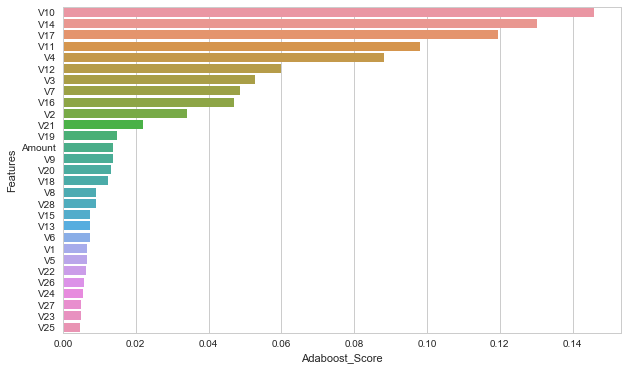

In [43]:
rf_cls = RandomForestClassifier(n_estimators = 90)

rf_cls.fit(X_train, Y_train)

feature_imp = np.round(rf_cls.feature_importances_, 5)
features = list(X_train.columns)
feature_imp_df = pd.DataFrame({'Features' :features, 'Adaboost_Score': feature_imp})
feature_imp_df.sort_values('Adaboost_Score', axis=0, ascending=False, inplace=True)
feature_imp_df

plt.figure(figsize=(10, 6))
sns.barplot( y = 'Features', x = 'Adaboost_Score', data = feature_imp_df )

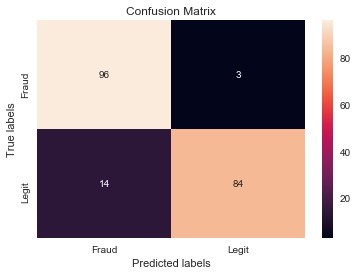

TrueNegative: 96
FalseNegative: 14
TruePostive: 84
FalsePostive: 3
Sensitivity 0.8571428571428571
Specificity 0.9696969696969697
F1 Score:  0.908108108108108
Precision:  0.9655172413793104
Recall:  0.8571428571428571
AUC:  0.9763261641033829
Total Accuracy :  0.91


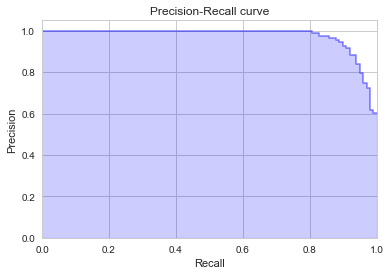

In [55]:
y_pred_test = rf_cls.predict(X_validation)
score_test = accuracy_score(Y_validation, y_pred_test)

ax= plt.subplot()
labels = ['Fraud','Legit']
CM = confusion_matrix(Y_validation , y_pred_test)
sns.heatmap(CM, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fraud', 'Legit']); ax.yaxis.set_ticklabels(['Fraud', 'Legit']);
plt.show()

print ("TrueNegative:", CM[0][0])
print ("FalseNegative:", CM[1][0])
print ("TruePostive:", CM[1][1])
print ("FalsePostive:", CM[0][1])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity",TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity",TNR)
    
#Precision, Recall and F1 score
F1_score = f1_score(Y_validation, y_pred_test)
print("F1 Score: ", F1_score)
Precision_score = precision_score(Y_validation, y_pred_test)
print("Precision: ", Precision_score)
Recall_score = recall_score(Y_validation, y_pred_test)
print("Recall: ", Recall_score)
    
#Calculating average precision 
try:
    y_pred_score = rf_cls.decision_function(X_validation)
except:
    y_pred_score = rf_cls.predict_proba(X_validation)[:,1]

average_precision = average_precision_score(Y_validation, y_pred_score)
print("AUC: ", average_precision)

print( 'Total Accuracy : ',np.round( accuracy_score( Y_validation, y_pred_test ), 2 ) )

precision, recall, _ = precision_recall_curve(Y_validation, y_pred_score)
plt.step(recall, precision, alpha=0.4, color='b', where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0, 1.05])
plt.xlim([0, 1])
plt.title('Precision-Recall curve')
plt.show()